In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("dataset/train.csv")
train

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0
...,...,...,...,...,...,...,...,...
209668,1617.0,8.42,1.0,150.00,47,5.800,202.800,0
209669,438.0,1.29,1.0,48.75,12,34.575,95.325,1
209670,571.0,2.82,1.0,63.75,0,6.000,69.750,0
209671,491.0,2.16,1.0,56.25,0,13.500,69.750,0


In [3]:
import seaborn as sns

In [5]:
train.corr()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
trip_duration,1.000000,0.005774,-0.001477,0.150331,0.029132,0.046432,0.142159,0.029961
distance_traveled,0.005774,1.000000,-0.000299,0.035934,0.013487,0.021734,0.036677,0.005567
num_of_passengers,-0.001477,-0.000299,1.000000,0.013224,0.007277,0.010044,0.014234,0.006360
fare,0.150331,0.035934,0.013224,1.000000,0.302044,0.299321,0.966748,0.146687
tip,0.029132,0.013487,0.007277,0.302044,1.000000,0.320919,0.508639,0.239334
miscellaneous_fees,0.046432,0.021734,0.010044,0.299321,0.320919,1.000000,0.452568,0.715497
total_fare,0.142159,0.036677,0.014234,0.966748,0.508639,0.452568,1.000000,0.267350
surge_applied,0.029961,0.005567,0.006360,0.146687,0.239334,0.715497,0.267350,1.000000


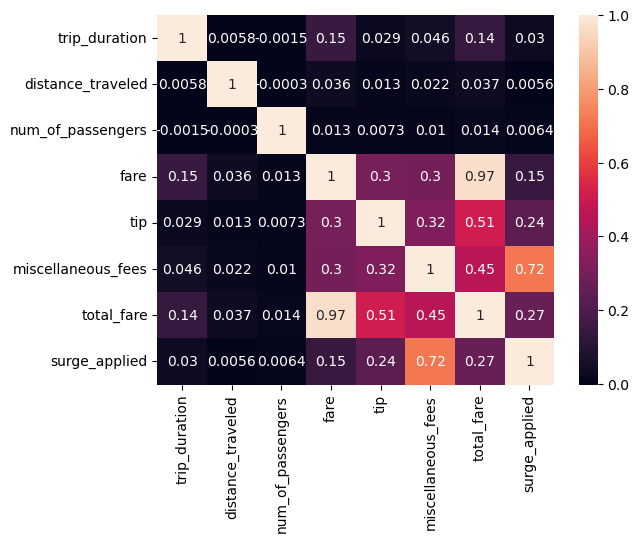

In [7]:
sns.heatmap(train.corr(), annot=True);

In [14]:
def correlation(dataset, threshold):
    col_corr=set() # set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr    

In [17]:
corr_features = correlation(train.drop('total_fare', axis=1),0.7)
len(set(corr_features))

1

In [18]:
corr_features

{'surge_applied'}